# Análisis de índices demográficos
En este notebook estaremos analizando la base de datos obtenida de https://data.un.org/ para resolver los siguientes dos incisos:
a) Definir la relación que guarda la tasa de mortalidad infantil con la esperanza de vida para ambos sexos en el año 2022.
b) Determinar que variables de esta base de datos se esncuentran más correlacionados en dicho año.

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('SYB65_246_202209_Population Growth, Fertility and Mortality Indicators.csv', encoding='latin1',skiprows=1)
df
columns_names = df.columns.values
columns_names

array(['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value',
       'Footnotes', 'Source'], dtype=object)

In [160]:
df['Series'].unique()

array(['Population annual rate of increase (percent)',
       'Total fertility rate (children per women)',
       'Infant mortality for both sexes (per 1,000 live births)',
       'Maternal mortality ratio (deaths per 100,000 population)',
       'Life expectancy at birth for both sexes (years)',
       'Life expectancy at birth for males (years)',
       'Life expectancy at birth for females (years)'], dtype=object)

## a) Relación entre la tasa de mortalidad infantil con la esperanza de vida para ambos sexos en el año 2022.
La esperanza de vida al nacer se define como cuánto tiempo, en promedio, puede esperar vivir un recién nacido, si las tasas de mortalidad actuales no cambian. La esperanza de vida al nacer es uno de los indicadores del estado de salud más utilizados. Los aumentos en la esperanza de vida al nacer se pueden atribuir a una serie de factores, incluido el aumento del nivel de vida, un mejor estilo de vida y una mejor educación, así como un mayor acceso a servicios de salud de calidad. Este indicador se presenta en forma total y por género y se mide en años.

La tasa de mortalidad infantil se define como el número de muertes de niños menores de un año, expresada por cada 1 000 nacidos vivos.Este indicador se mide en términos de muertes por cada 1 000 nacidos vivos.

In [161]:
#Creamos una variable para los parámetros que nos interesan
variables = df[(df['Series'].isin(['Infant mortality for both sexes (per 1,000 live births)', 
                                   'Life expectancy at birth for both sexes (years)'])) & (df['Year'] == 2022)]
variables


,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
23,1,"Total, all countries or areas",2022,"Infant mortality for both sexes (per 1,000 liv...",27.5,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
24,1,"Total, all countries or areas",2022,Life expectancy at birth for both sexes (years),71.7,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
41,2,Africa,2022,"Infant mortality for both sexes (per 1,000 liv...",44.2,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
42,2,Africa,2022,Life expectancy at birth for both sexes (years),62.2,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
68,15,Northern Africa,2022,"Infant mortality for both sexes (per 1,000 liv...",21.4,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...
6597,887,Yemen,2022,Life expectancy at birth for both sexes (years),63.7,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6623,894,Zambia,2022,"Infant mortality for both sexes (per 1,000 liv...",38.2,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
6624,894,Zambia,2022,Life expectancy at birth for both sexes (years),61.8,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6650,716,Zimbabwe,2022,"Infant mortality for both sexes (per 1,000 liv...",37.4,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."


In [162]:
#Al imprimir el df observamos que en la columna "Unnamed:1" existen dos filas que consideran a todos los países, por lo que no vamos a consideras esas dos filas en nuestro analisis.
variables = variables[variables['Unnamed: 1'] != 'Total, all countries or areas']
variables

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
41,2,Africa,2022,"Infant mortality for both sexes (per 1,000 liv...",44.2,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
42,2,Africa,2022,Life expectancy at birth for both sexes (years),62.2,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
68,15,Northern Africa,2022,"Infant mortality for both sexes (per 1,000 liv...",21.4,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
69,15,Northern Africa,2022,Life expectancy at birth for both sexes (years),71.3,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
95,202,Sub-Saharan Africa,2022,"Infant mortality for both sexes (per 1,000 liv...",47.5,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...
6597,887,Yemen,2022,Life expectancy at birth for both sexes (years),63.7,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6623,894,Zambia,2022,"Infant mortality for both sexes (per 1,000 liv...",38.2,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
6624,894,Zambia,2022,Life expectancy at birth for both sexes (years),61.8,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6650,716,Zimbabwe,2022,"Infant mortality for both sexes (per 1,000 liv...",37.4,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."


In [163]:
#Pivoteamos las variables para tenerlas como columnas
new_df = variables.pivot(index='Unnamed: 1', columns='Series', values='Value')
new_df

Series,"Infant mortality for both sexes (per 1,000 live births)",Life expectancy at birth for both sexes (years)
Unnamed: 1,,
Afghanistan,40.8,62.9
Africa,44.2,62.2
Albania,8.2,76.8
Algeria,16.6,77.1
American Samoa,7.0,72.7
...,...,...
Western Europe,3.1,82.1
Western Sahara,23.7,71.0
Yemen,46.8,63.7


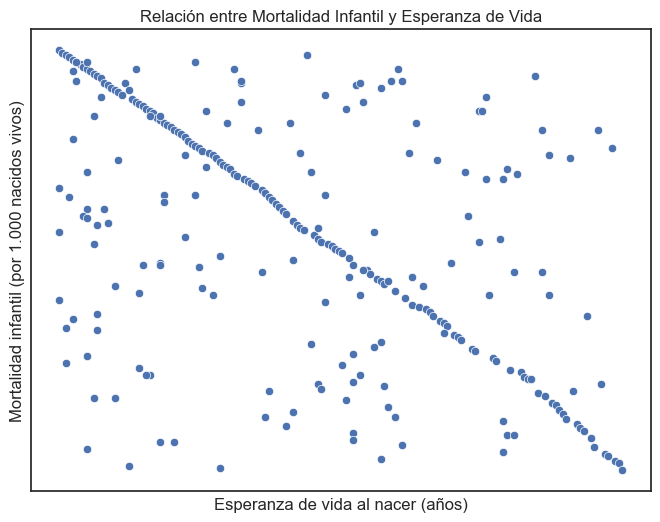

In [172]:
#Realizamos un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_df, x='Life expectancy at birth for both sexes (years)',
                y='Infant mortality for both sexes (per 1,000 live births)')
plt.xlabel('Esperanza de vida al nacer (años)')
plt.ylabel('Mortalidad infantil (por 1.000 nacidos vivos)')
plt.title('Relación entre Mortalidad Infantil y Esperanza de Vida')
plt.xticks([]) 
plt.yticks([])

plt.show()

Dado que la tasa de mortalidad infantil y la esperanza de vida al nacer son medidas inversas entre sí, es decir, cuando una aumenta, la otra tiende a disminuir, se observa una relación negativa en el gráfico. A medida que aumenta la tasa de mortalidad infantil (es decir, hay más muertes de bebés por cada 1,000 nacimientos vivos), tiende a disminuir la esperanza de vida al nacer.

Esta relación negativa en el gráfico indica que en general, los países o regiones con una mayor tasa de mortalidad infantil tienden a tener una esperanza de vida al nacer más baja, y viceversa. Sin embargo, es importante tener en cuenta que otros factores también pueden influir en la relación y que esta interpretación se basa en la visualización de los datos en el gráfico.


## b) Determinar que variables de esta base de datos se esncuentran más correlacionados en dicho año.

In [187]:
# Filtramos los datos por el año 2022
df_2022 = df[df['Year'] == 2022]
df_2022

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
21,1,"Total, all countries or areas",2022,Population annual rate of increase (percent),0.8,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
22,1,"Total, all countries or areas",2022,Total fertility rate (children per women),2.3,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
23,1,"Total, all countries or areas",2022,"Infant mortality for both sexes (per 1,000 liv...",27.5,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
24,1,"Total, all countries or areas",2022,Life expectancy at birth for both sexes (years),71.7,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
25,1,"Total, all countries or areas",2022,Life expectancy at birth for males (years),69.1,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
6649,716,Zimbabwe,2022,Total fertility rate (children per women),3.4,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6650,716,Zimbabwe,2022,"Infant mortality for both sexes (per 1,000 liv...",37.4,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
6651,716,Zimbabwe,2022,Life expectancy at birth for both sexes (years),59.4,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6652,716,Zimbabwe,2022,Life expectancy at birth for males (years),56.4,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."


In [195]:
# Pivoteamos el DataFrame para tener las variables como columnas
df_pivot = df_2022.pivot(index='Unnamed: 1', columns='Series', values='Value')
df_pivot

Series,"Infant mortality for both sexes (per 1,000 live births)",Life expectancy at birth for both sexes (years),Life expectancy at birth for females (years),Life expectancy at birth for males (years),Population annual rate of increase (percent),Total fertility rate (children per women)
Unnamed: 1,,,,,,
Afghanistan,40.8,62.9,66.2,59.8,2.7,4.5
Africa,44.2,62.2,64.1,60.2,2.3,4.2
Albania,8.2,76.8,79.5,74.5,-0.4,1.4
Algeria,16.6,77.1,78.5,75.9,1.6,2.8
American Samoa,7.0,72.7,75.5,70.0,-0.8,2.3
...,...,...,...,...,...,...
Western Europe,3.1,82.1,84.5,79.6,0.1,1.6
Western Sahara,23.7,71.0,73.1,69.3,2.0,2.3
Yemen,46.8,63.7,67.2,60.5,2.2,3.7


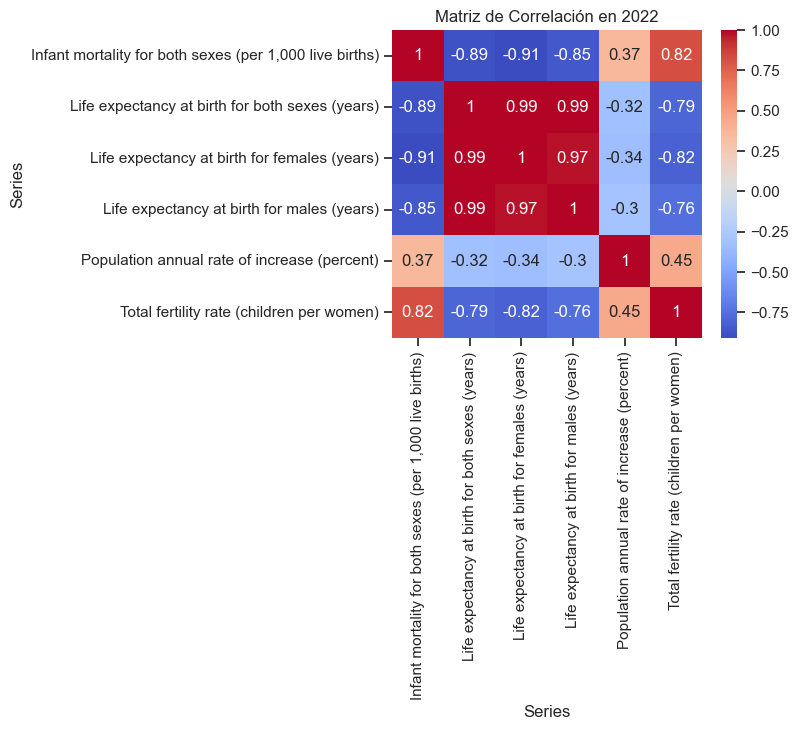

In [200]:
# Calculamos la matriz de correlación
correlacion = df_pivot.corr()

# Creamos un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(5, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación en 2022')
plt.show()

En el contexto de la correlación, un valor cercano a 1 (positivo) indica una correlación positiva fuerte, mientras que el valor de correlación es negativo, significa que las variables tienen una relación inversa. Esto significa que cuando el valor de una variable aumenta, el valor de la otra variable tiende a disminuir, y viceversa. 

Por lo que podemos concluir lo mismo que en nuestro gráfico de dispersión: las variables con mayor relación negativa o relación inversa son 'Esperanza de vida al nacer (años)' con 'Mortalidad infantil (por 1.000 nacidos vivos)'. Y así mismo las variables que mayor relación tienen es 'Mortalidad infantil para ambos sexos' y 'La tasa de fertilidad total'.

Nota: se tienen variables con un indice de correlación de casi uno, pero por obviedad, ya que son la misma variable solo que divida por cada sexo, no las tomamos en cuenta para las conclusiones de este inciso. 